# Rolling the DICE in metaanalysis

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import statsmodels.api as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
# import dataproject


ModuleNotFoundError: No module named 'matplotlib_venn'

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


In [15]:
Nordhaus =  'NordhausD.csv' # open the file and have a look at it
pd.read_csv(Nordhaus).head(70)

,Study,Year,Temp (celsius),Impact (%)
0,Cline,1992,2.500,-1.10
1,Cline,1992,10.000,-6.00
2,Nordhaus a,1994,3.000,-1.33
3,Nordhaus b,1994,3.000,-3.60
4,Nordhaus b,1994,6.000,-10.40
5,Tol,1994,2.500,-1.90
6,Frankhauser,1995,2.500,-1.40
7,Nordhays and Yang,1996,2.500,-1.70
8,Mendelsohn et al.,2000,2.200,0.03
9,Mendelsohn et al.,2000,2.200,0.07


In [16]:
Tol = 'TolD.csv' # open the file and have a look at it
pd.read_csv(Tol).head(50)

,Study,Year,Temp (celsius),Impact (%)
0,d'Arge,1979,-1.0,-0.60
1,Nordhaus,1982,2.5,-3.00
2,Nordhaus,1991,3.0,-1.00
3,Schauer,1995,2.5,-5.22
4,Plambeck and Hope,1996,2.5,-2.90
5,Berz,2001,2.5,-1.50
6,Smith et al. (2001),2001,2.5,-9.00
7,Smith et al. (2001),2001,1.0,-2.70
8,Horowitz,2009,1.0,3.80
9,Eboli et al.,2010,3.0,-1.35


# Read and clean data

Import your data, either through an API or manually, and load it. 

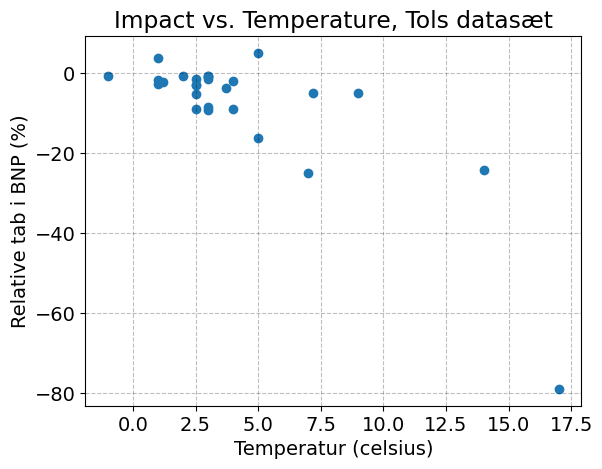

In [11]:
# Load the data from CSV file into a DataFrame)
data = pd.read_csv('TolD.csv')
# Assuming your CSV file has columns 'x' and 'y'
x = data['Temp (celsius)']
y = data['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperatur (celsius)')
plt.ylabel('Relative tab i BNP (%)')
plt.title('Impact vs. Temperature, Tols datasæt')
plt.grid(True)
plt.show()

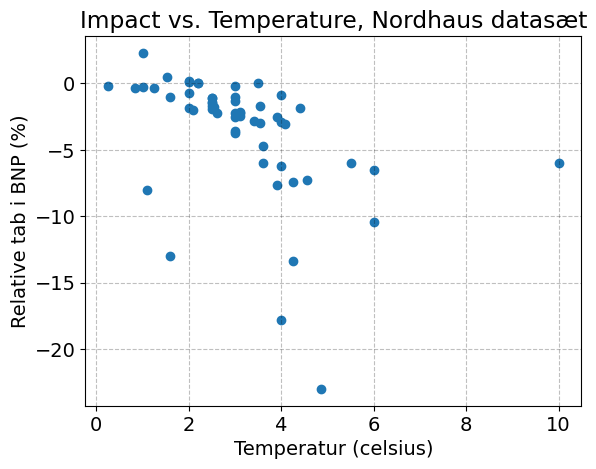

In [12]:
# Load the data from CSV file into a DataFrame)
data = pd.read_csv('NordhausD.csv')
# Assuming your CSV file has columns 'x' and 'y'
x = data['Temp (celsius)']
y = data['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperatur (celsius)')
plt.ylabel('Relative tab i BNP (%)')
plt.title('Impact vs. Temperature, Nordhaus datasæt')
plt.grid(True)
plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [24]:
# Load the datasets
tol_data = pd.read_csv('TolD.csv')
nordhaus_data = pd.read_csv('NordhausD.csv')

# Filter TolD.csv based on conditions
tol_filtered = tol_data[(tol_data['Temp (celsius)'] <= 4) & (tol_data['Year'] > 2000)]

# Merge the filtered TolD.csv with NordhausD.csv
merged_data = pd.merge(tol_filtered, nordhaus_data, on='Year', how='inner')

# Display the merged data
print(merged_data)

              Study_x  Year  Temp (celsius)_x  Impact (%)_x  \
0        Eboli et al.  2010               3.0         -1.35   
1     Weitzman (2010)  2010               4.0         -8.87   
2                Hope  2011               3.0         -0.70   
3         Ng and zhao  2011               1.0         -1.61   
4    Mc Callum et al.  2013               2.0         -0.70   
5    Mc Callum et al.  2013               4.0         -1.80   
6   Sartori and roson  2016               3.0         -0.70   
7   Howard and sylvan  2020               3.0         -9.20   
8   Howard and sylvan  2020               3.0         -9.20   
9   Howard and sylvan  2021               1.2         -2.20   
10  Howard and sylvan  2021               1.2         -2.20   
11  Howard and sylvan  2021               3.0         -8.50   
12  Howard and sylvan  2021               3.0         -8.50   
13       Conte et al.  2021               3.7         -3.70   
14       Conte et al.  2021               3.7         -

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

Her køres en regression med Nordhaus datasæt

In [30]:
nordhaus_data = pd.read_csv('NordhausD.csv')

# Perform linear regression
X = nordhaus_data['Temp (celsius)']
X = sm.add_constant(X)  # Add a constant term to the predictor
y = nordhaus_data['Impact (%)']

model = sm.OLS(y, X).fit()  # Fit the linear regression model

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Impact (%)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           0.000486
Time:                        14:29:48   Log-Likelihood:                -158.25
No. Observations:                  56   AIC:                             320.5
Df Residuals:                      54   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5934      1.250      0.

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

In [ ]:
Her køres en regression med Tols datasæt

In [31]:
tol_data = pd.read_csv('TolD.csv')

# Perform linear regression
X = tol_data['Temp (celsius)']
X = sm.add_constant(X)  # Add a constant term to the predictor
y = tol_data['Impact (%)']

model = sm.OLS(y, X).fit()  # Fit the linear regression model

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Impact (%)   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     46.56
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           3.75e-07
Time:                        14:30:16   Log-Likelihood:                -98.228
No. Observations:                  27   AIC:                             200.5
Df Residuals:                      25   BIC:                             203.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.7602      2.707      2.

Her køres en regression med begge datasæt på en gang

In [32]:
tol_data = pd.read_csv('TolD.csv')
nordhaus_data = pd.read_csv('NordhausD.csv')

# Perform linear regression
X = pd.concat([tol_data['Temp (celsius)'], nordhaus_data['Temp (celsius)']])
X = sm.add_constant(X)  # Add a constant term to the predictor
y = pd.concat([tol_data['Impact (%)'], nordhaus_data['Impact (%)']])

model = sm.OLS(y, X).fit()  # Fit the linear regression model

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Impact (%)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     98.52
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.19e-15
Time:                        14:30:47   Log-Likelihood:                -274.53
No. Observations:                  83   AIC:                             553.1
Df Residuals:                      81   BIC:                             557.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8219      1.227      3.

# Conclusion

ADD CONCISE CONLUSION.